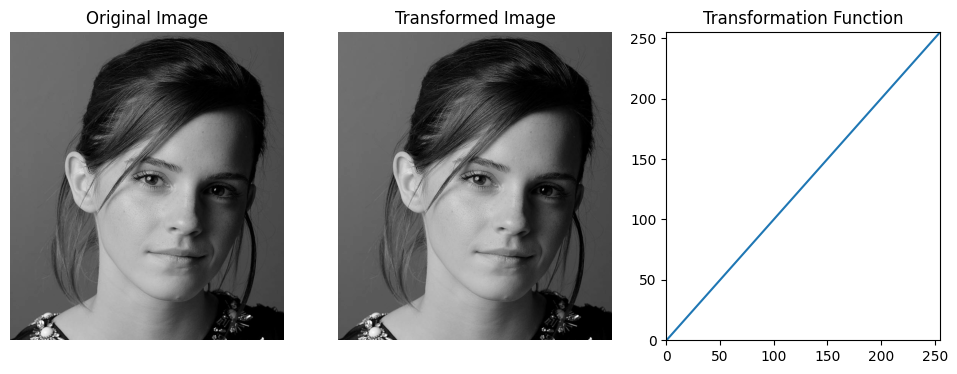

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
f = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)
t = np.arange(256, dtype=np.uint8)
g = t[f]
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
for a in ax[0:2]:
    a.axis('off')
ax[2].plot(t)
ax[2].set_ylim([0, 255])
ax[2].set_xlim([0, 255])
ax[2].set_title('Transformation Function')
plt.show()

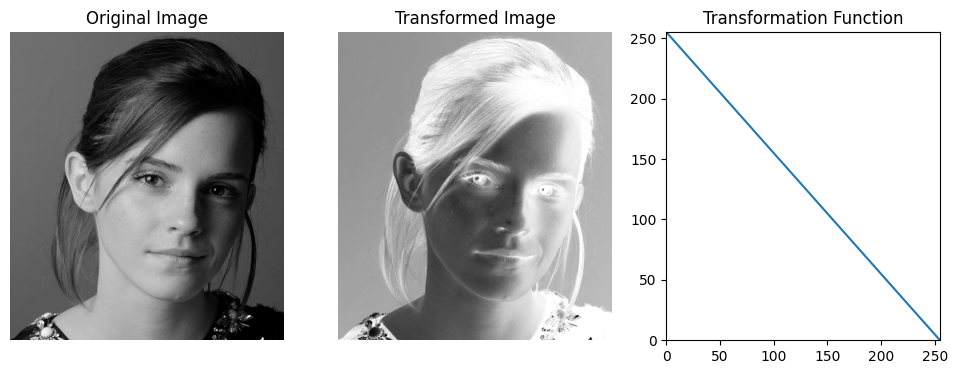

In [4]:
# Negative Transformation
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
f = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)
t = np.arange(255, -1, -1,  dtype=np.uint8)
g = t[f]
#plt.plot(t)

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
for a in ax[0:2]:
    a.axis('off')
ax[2].plot(t)
ax[2].set_ylim([0, 255])
ax[2].set_xlim([0, 255])
ax[2].set_title('Transformation Function')
plt.show()

101
50
105
256


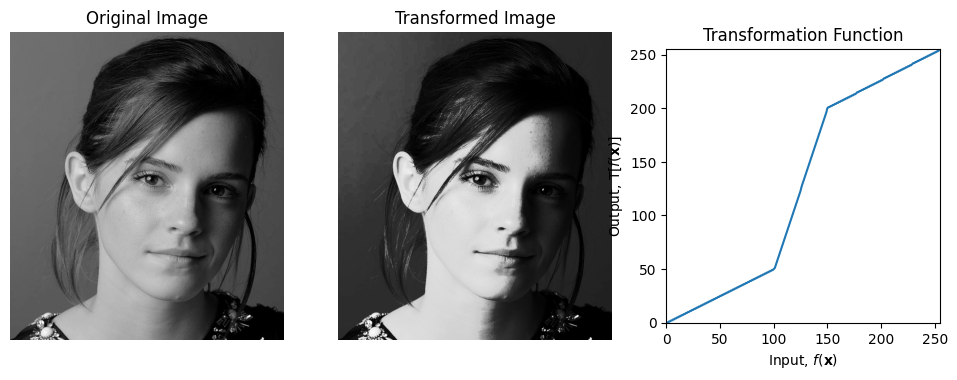

In [5]:
# Intensity Windowing
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(100, 50), (150, 200)])

t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
print(len(t1))
t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
print(len(t2))
t3 = np.linspace(c[1,1] + 1, 255, 255 - c[1,0]).astype('uint8')
print(len(t3)) 
 
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

img_orig = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)
fig, ax = plt.subplots(1,3, figsize=(12, 4))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(transform[f], cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
for a in ax[0:2]:
    a.axis('off')
ax[2].plot(transform)
ax[2].set_title('Transformation Function')
ax[2].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[2].set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[2].set_xlim(0,255)
ax[2].set_ylim(0,255)
ax[2].set_aspect('equal') 
plt.show()

258


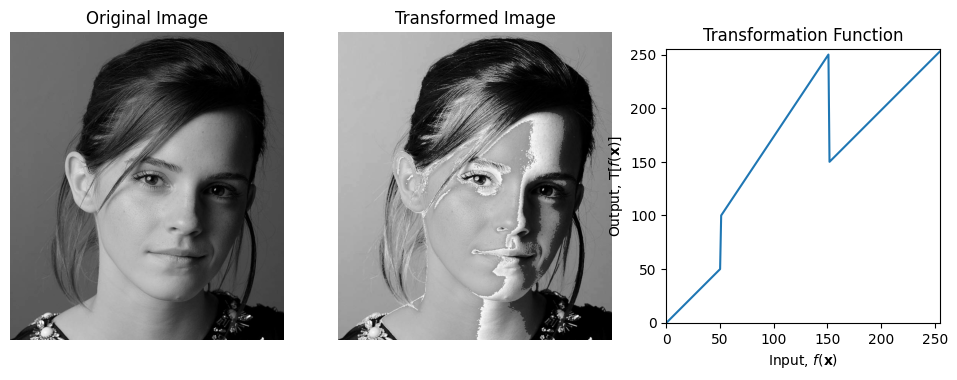

In [6]:
# Intensity Windowing
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(0, 50, 51)
y1 = x1

x2 = np.array([50, 50])
y2 = np.array([50, 100])

x3 = np.linspace(50, 150, 101)
y3 = np.linspace(100, 250, 101)

x4 = np.array([150, 150])
y4 = np.array([250, 150])

x5 = np.linspace(150, 255, 106)
y5 = np.linspace(150, 255, 106)

# Combine the segments
x = np.concatenate((x1, x2[1:], x3[1:], x4[1:], x5[1:]))
y = np.concatenate((y1, y2[1:], y3[1:], y4[1:], y5[1:]))
print(len(y))

f = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)
fig, ax = plt.subplots(1,3, figsize=(12, 4))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(y[f], cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
for a in ax[0:2]:
    a.axis('off')
ax[2].plot(y,)
ax[2].set_title('Transformation Function')
ax[2].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[2].set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[2].set_xlim(0,255)
ax[2].set_ylim(0,255)
ax[2].set_aspect('equal') 
plt.show()

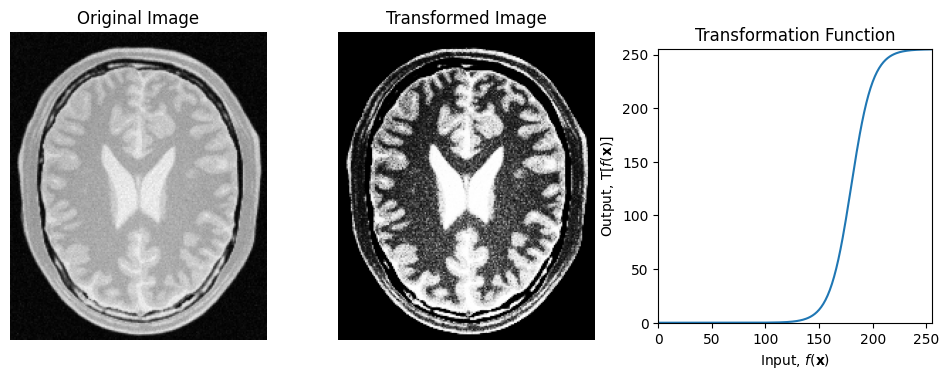

In [7]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def white_matter_curve(x):
    #sigmoid function to map the intensity values for white matter
    aplpha = 0.1
    beta = 180
    curve = 255/(1+np.exp(-aplpha*(x-beta)))
    return curve

f = np.linspace(0,255,256)

y_white = white_matter_curve(f)

img = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert img is not None
fig, ax = plt.subplots(1,3, figsize=(12, 4))
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(y_white[img], cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
for a in ax[0:2]:
    a.axis('off')
ax[2].plot(y_white)
ax[2].set_title('Transformation Function')
ax[2].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[2].set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[2].set_xlim(0,255)
ax[2].set_ylim(0,255)
ax[2].set_aspect('equal')
plt.show()

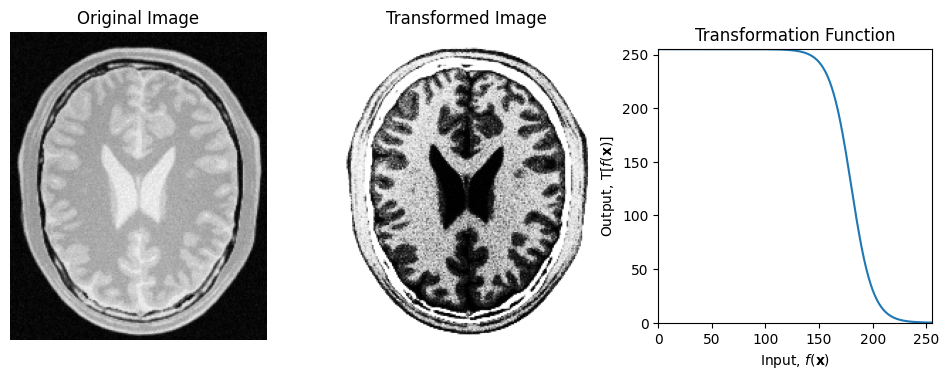

In [8]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def white_matter_curve(x):
    #inverse sigmoid function to map the intensity values for dark matter
    aplpha = 0.1
    beta = 180
    curve = 255/(1+np.exp(aplpha*(x-beta)))
    return curve

f = np.linspace(0,255,256)

y_white = white_matter_curve(f)

img = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert img is not None
fig, ax = plt.subplots(1,3, figsize=(12, 4))
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(y_white[img], cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
for a in ax[0:2]:
    a.axis('off')
ax[2].plot(y_white)
ax[2].set_title('Transformation Function')
ax[2].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[2].set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[2].set_xlim(0,255)
ax[2].set_ylim(0,255)
ax[2].set_aspect('equal')
plt.show()

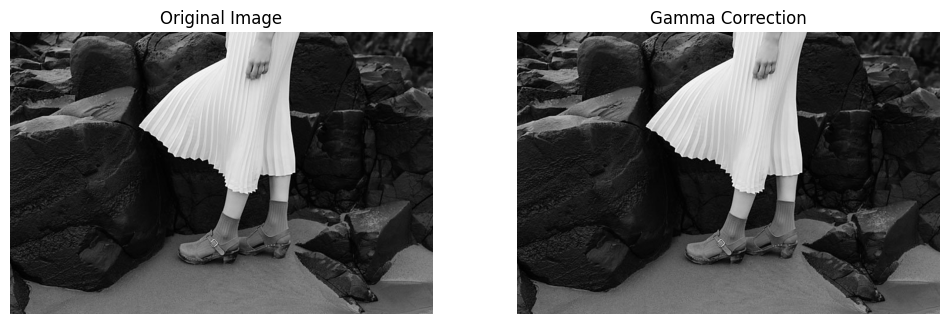

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread('a1images\highlights_and_shadows.jpg', cv.IMREAD_GRAYSCALE)

#Apply Linear gamma correction
gamma = 1.0

t = np.array([((i/255.0)**gamma)*255 for i in np.arange(0,256)]).astype('uint8')
g = cv.LUT(img, t)

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Gamma Correction')
for a in ax:
    a.axis('off')
plt.show()